<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#What-if-we-take-an-experiment-where-we-know-that-we-reached-perfect-balance?" data-toc-modified-id="What-if-we-take-an-experiment-where-we-know-that-we-reached-perfect-balance?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What if we take an experiment where we know that we reached perfect balance?</a></span><ul class="toc-item"><li><span><a href="#Previous-experiment" data-toc-modified-id="Previous-experiment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Previous experiment</a></span></li></ul></li><li><span><a href="#2-Nodes-with-no-NN-init" data-toc-modified-id="2-Nodes-with-no-NN-init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2 Nodes with no NN init</a></span></li><li><span><a href="#2-Nodes-with-no-NN-init,-with-a-longer-inner-iteration" data-toc-modified-id="2-Nodes-with-no-NN-init,-with-a-longer-inner-iteration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2 Nodes with no NN init, with a longer inner iteration</a></span></li><li><span><a href="#2-Nodes-WITH-NN-init" data-toc-modified-id="2-Nodes-WITH-NN-init-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2 Nodes WITH NN init</a></span></li></ul></div>

This notebook is to enable line search. We will use this notebook exclusively to debug the implementation of line search on a single instance of the graph. 

# Load

In [49]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

from amod_ed.FW_OuterUpdate import FW_graph_extension

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# What if we take an experiment where we know that we reached perfect balance? 

In [18]:
n_nodes=2

In [73]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [74]:
print(os.listdir(path))

['line_search_notNNinit_longerNI.pkl', 'new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'line_search_withNNinit.pkl', 'new_init_with_step.pkl']


In [83]:
filename=os.listdir(path)[2]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW_GOOD, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

initial_setup.pkl


In [76]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

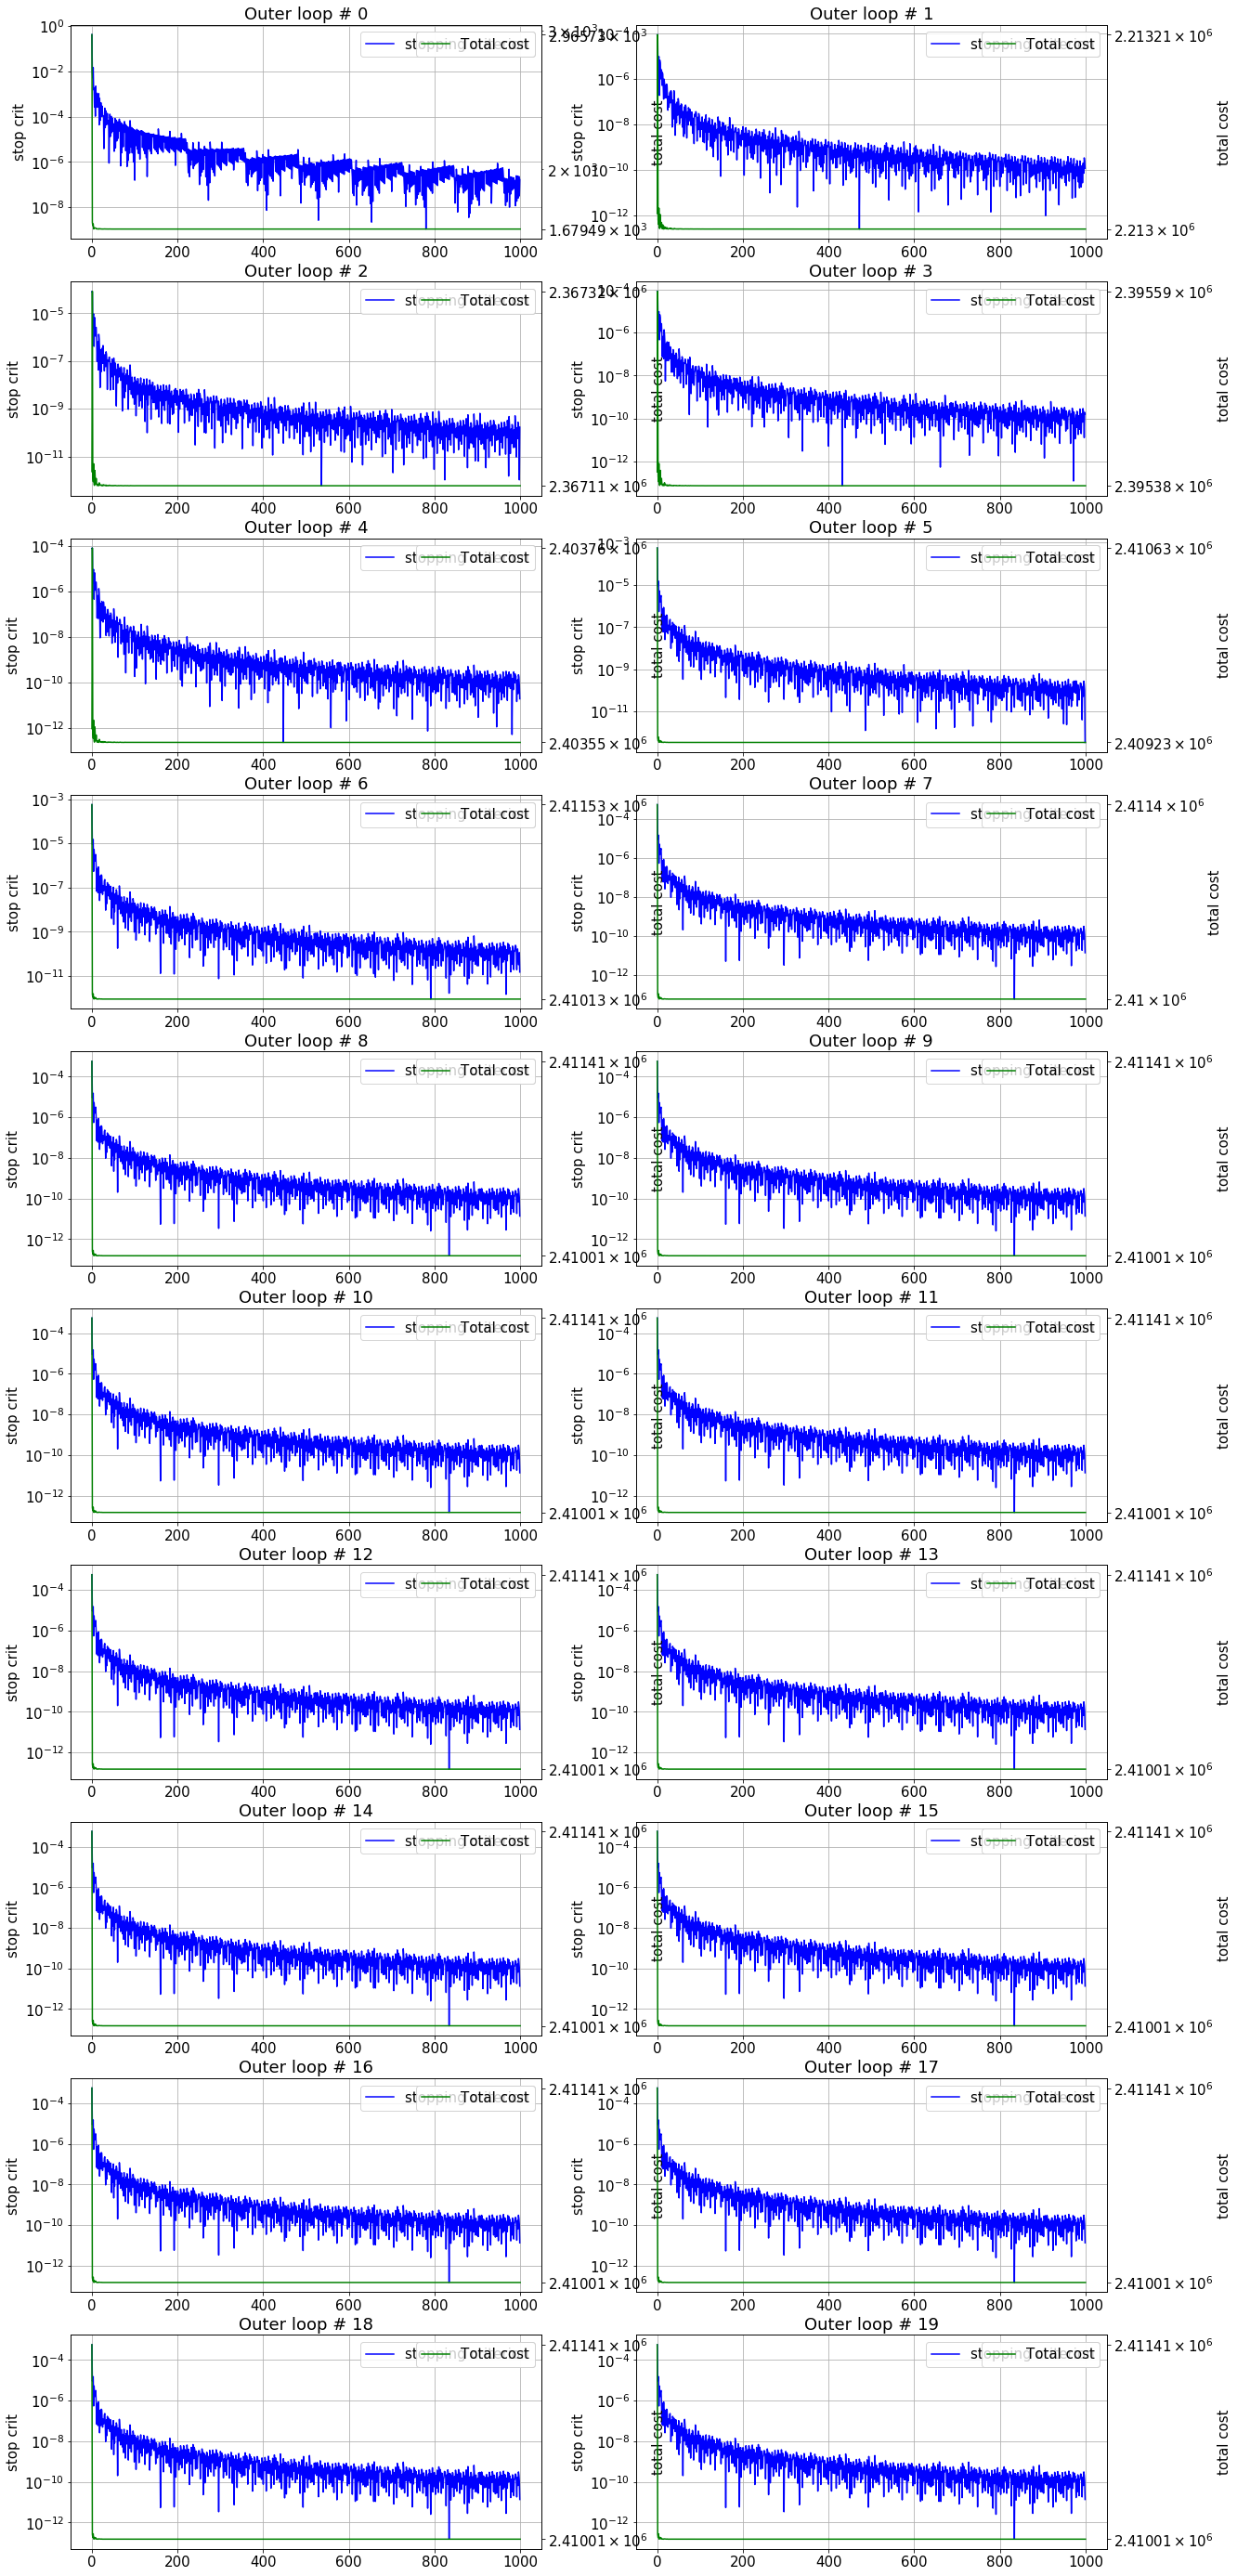

In [77]:
plot_stop_and_cost(opt_res)

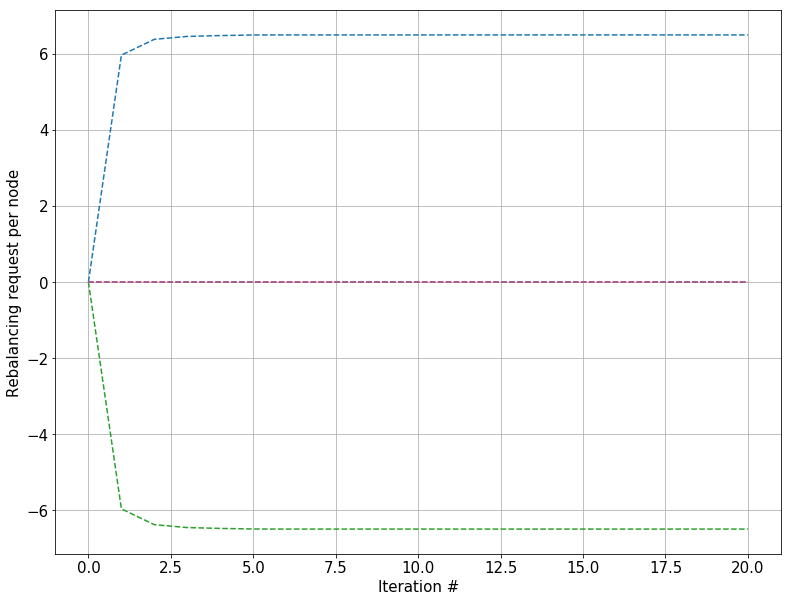

In [78]:
plot_ri_list(ri_FW, save = False, path = None)

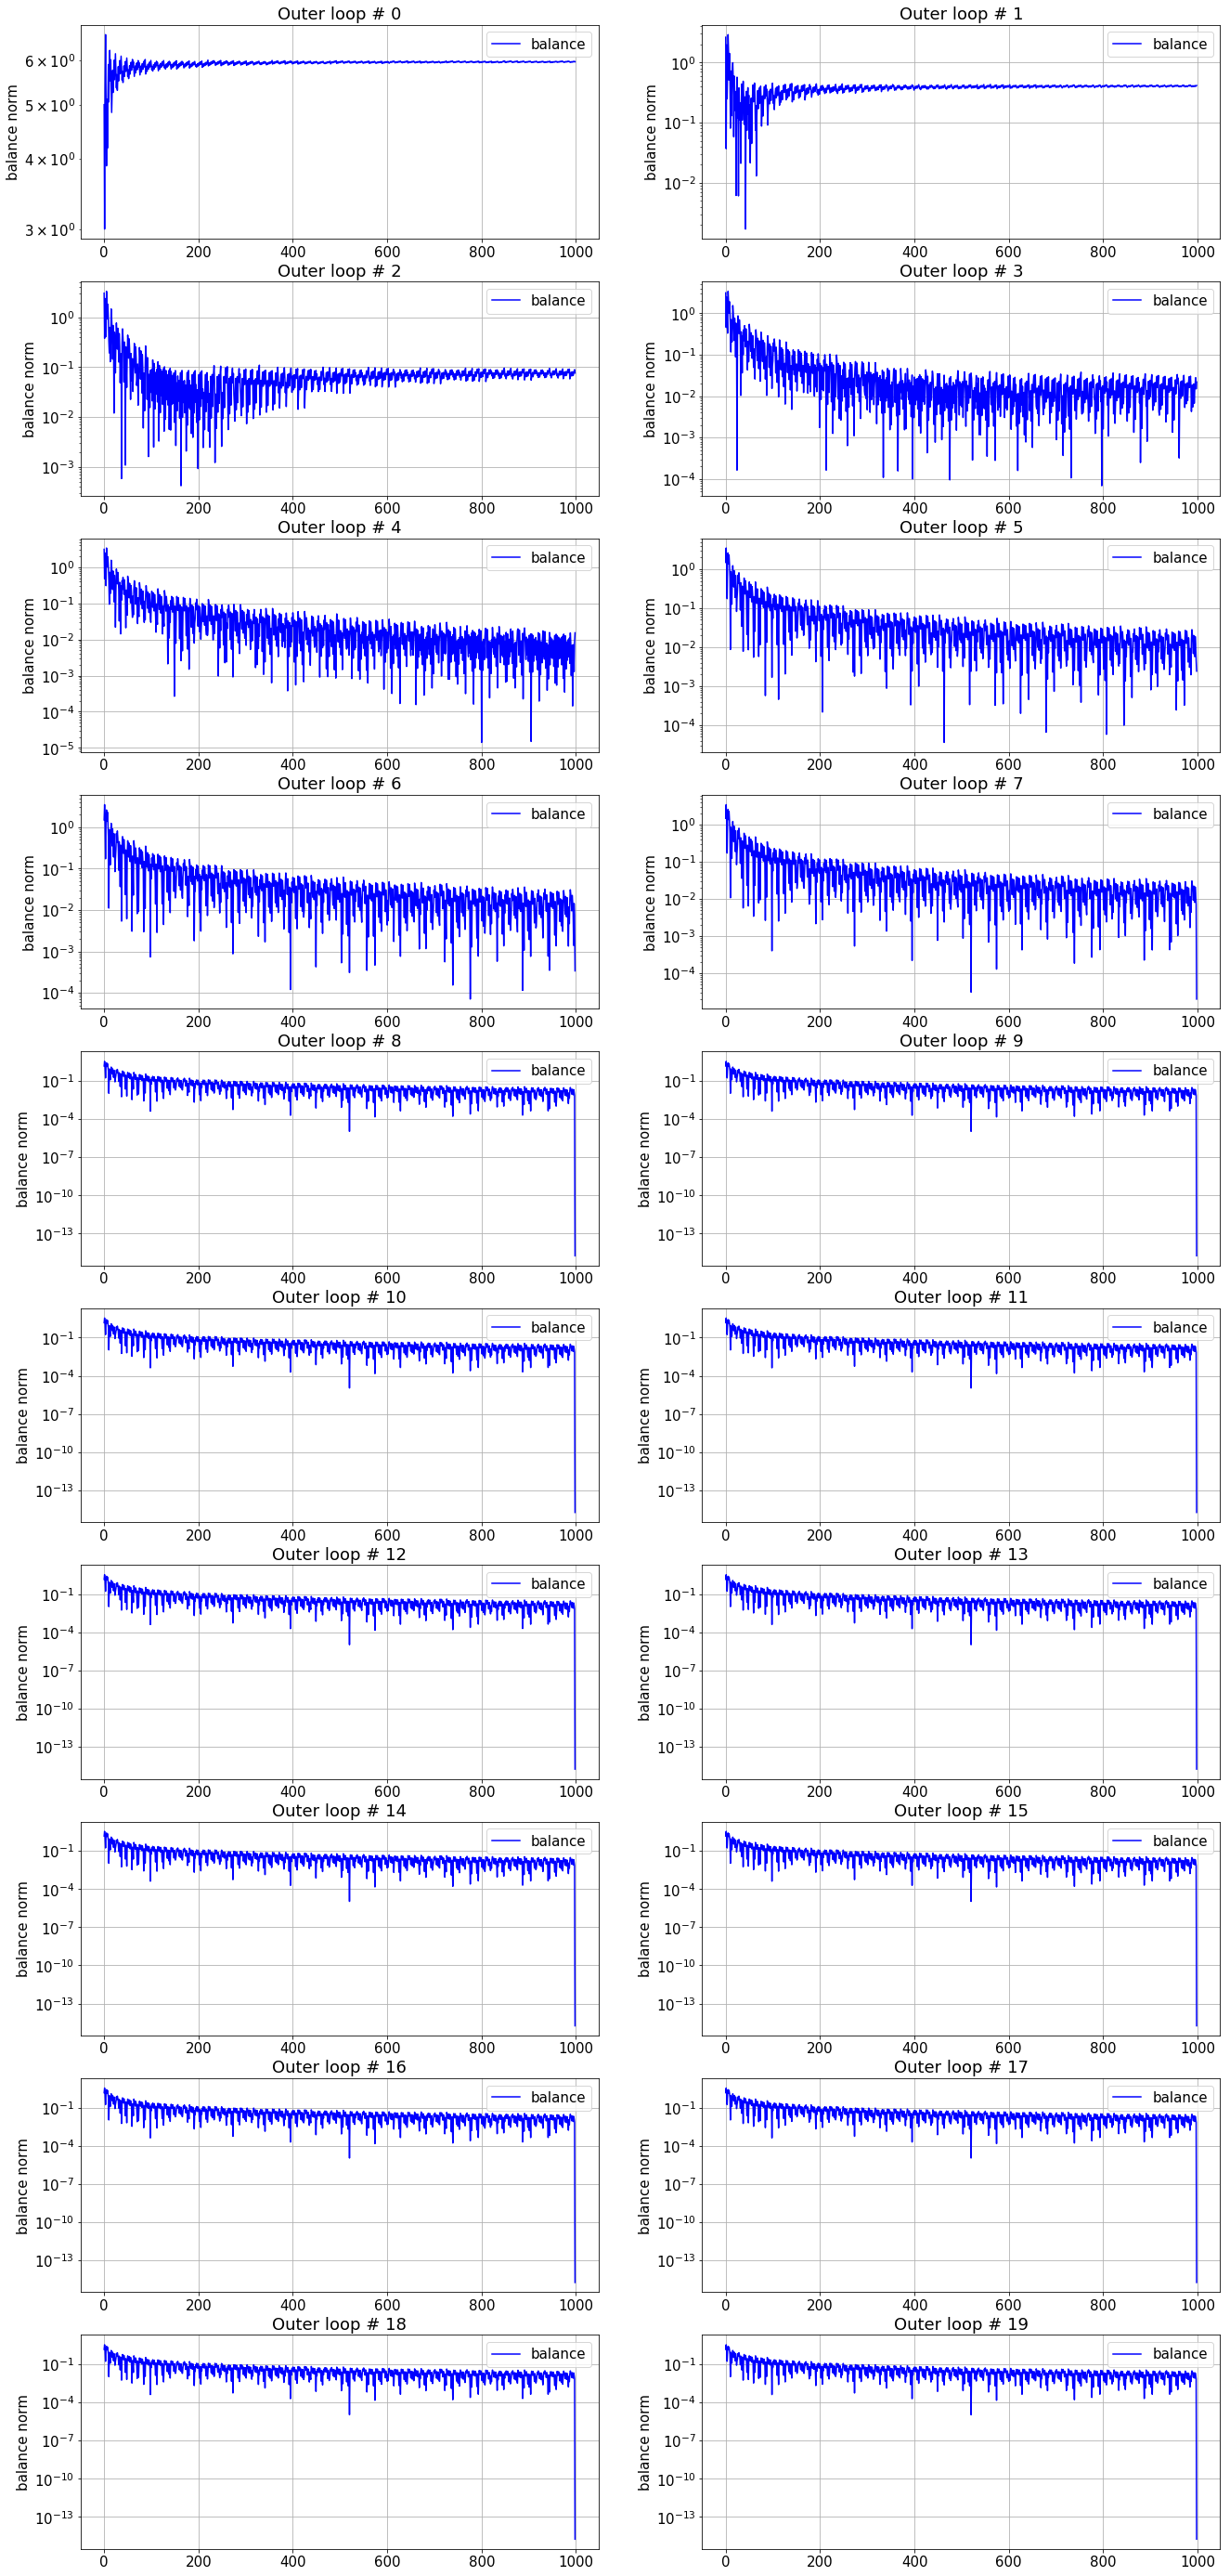

In [79]:
plot_balance_list(balance_list, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

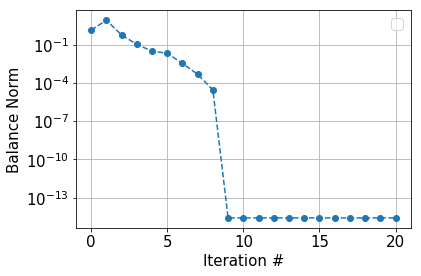

In [80]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

we know that at the end we have a good guess of rebalancers

In [84]:
ri_FW_GOOD[-1]

{'0': 6.494304099094502,
 '0_p': 0.0,
 '1': -6.494304099094502,
 '1_p': 0.0,
 'R': 0.0}

We will consider this as the real ri_FW

## Previous experiment

We load a previous experiment just to have the graphs etc. 

In [50]:
subfolder = 'unstucking_balance'

In [51]:
n_nodes=2

In [52]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [54]:
print(os.listdir(path))

['line_search_notNNinit_longerNI.pkl', 'new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'line_search_withNNinit.pkl', 'new_init_with_step.pkl']


In [55]:
filename=os.listdir(path)[-3]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

line_search_notNNinit.pkl


In [56]:
params

{'L': 10000,
 'ni': 20,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

In [95]:
G_ref = G_FW1[0]
ri_ref = ri_FW1[2]
ri_ref = ri_FW_GOOD[-1]

In [96]:
ri_ref

{'0': 6.494304099094502,
 '0_p': 0.0,
 '1': -6.494304099094502,
 '1_p': 0.0,
 'R': 0.0}

We are going to solve only the inner iterations, as they are the ones causing problems

In [97]:
edge_list =[]
for e in G_ref.edges():
    edge_list.append(e)

In [98]:
G_list, y_list, opt_res, OD_list, i, balance_list = FW_graph_extension(G_ref, OD, edge_list, ri_ref, FW_tol=0,
                       step='line_search', evolving_bounds=False, max_iter=50,
                       stopping_criterion='relative_progress', update_factor=1.1, i_offset = 0)

('0', '1') 10.0 + var184824 * -10.0
('0', 'R') 6.494304099094502 + var184824 * 0.0
('0', '1_p') 10.0 + var184824 * -10.0
('0', '0_p') 0.0 + var184824 * 10.0
('1', '0') 16.494304099094503 + var184824 * -10.0
('1', 'R') 0.0 + var184824 * 0.0
('1', '0_p') 10.0 + var184824 * -10.0
('1', '1_p') 0.0 + var184824 * 10.0
solver ECOS: 0.6458815806795148
Status of line search problem :  optimal_inaccurate
('0', '1') 3.5411841932048516 + var185534 * 6.458815806795148
('0', 'R') 6.494304099094502 + var185534 * 0.0
('0', '1_p') 3.5411841932048516 + var185534 * -3.5411841932048516
('0', '0_p') 6.458815806795148 + var185534 * -6.458815806795148
('1', '0') 10.035488292299354 + var185534 * -3.5411841932048516
('1', 'R') 0.0 + var185534 * 0.0
('1', '0_p') 3.5411841932048516 + var185534 * 6.458815806795148
('1', '1_p') 6.458815806795148 + var185534 * 3.5411841932048516
solver ECOS: 0.48419610465800156
Status of line search problem :  optimal_inaccurate
('0', '1') 6.66851764755859 + var186244 * 3.331482352

solver ECOS: 1.0939451183603005e-06
Status of line search problem :  optimal_inaccurate
('0', '1') 8.78700859149116 + var197604 * 1.2129914085088398
('0', 'R') 6.494304099094502 + var197604 * 0.0
('0', '1_p') 2.8394671339014805 + var197604 * -2.8394671339014805
('0', '0_p') 1.2129914085088391 + var197604 * -1.2129914085088391
('1', '0') 9.333771232995982 + var197604 * -2.83946713390148
('1', 'R') 0.0 + var197604 * 0.0
('1', '0_p') 8.78700859149116 + var197604 * 1.2129914085088398
('1', '1_p') 7.16053286609852 + var197604 * 2.83946713390148
solver ECOS: 3.2072167633752745e-06
Status of line search problem :  optimal_inaccurate
('0', '1') 8.78701248181754 + var198314 * 1.2129875181824605
('0', 'R') 6.494304099094502 + var198314 * 0.0
('0', '1_p') 2.8394580271148895 + var198314 * -2.8394580271148895
('0', '0_p') 1.2129875181824599 + var198314 * -1.2129875181824599
('1', '0') 9.333762126209391 + var198314 * -2.8394580271148895
('1', 'R') 0.0 + var198314 * 0.0
('1', '0_p') 8.78701248181754 

solver ECOS: 7.610933847155073e-06
Status of line search problem :  optimal_inaccurate
('0', '1') 8.805303370634388 + var208254 * 1.1946966293656125
('0', 'R') 6.494304099094502 + var208254 * 0.0
('0', '1_p') 2.796641254233439 + var208254 * -2.796641254233439
('0', '0_p') 1.1946966293656156 + var208254 * -1.1946966293656156
('1', '0') 9.290945353327942 + var208254 * -2.79664125423344
('1', 'R') 0.0 + var208254 * 0.0
('1', '0_p') 8.805303370634388 + var208254 * 1.1946966293656125
('1', '1_p') 7.203358745766559 + var208254 * 2.7966412542334407
solver ECOS: 1.9029066485856785e-05
Status of line search problem :  optimal_inaccurate
('0', '1') 8.805326104595979 + var208964 * 1.194673895404021
('0', 'R') 6.494304099094502 + var208964 * 0.0
('0', '1_p') 2.796588036761075 + var208964 * -2.796588036761075
('0', '0_p') 1.194673895404025 + var208964 * -1.194673895404025
('1', '0') 9.290892135855577 + var208964 * -2.796588036761075
('1', 'R') 0.0 + var208964 * 0.0
('1', '0_p') 8.805326104595979 + 

solver ECOS: 0.0911193271503705
Status of line search problem :  optimal_inaccurate
('0', '1') 8.920486566620571 + var218904 * 1.0795134333794287
('0', 'R') 6.494304099094504 + var218904 * -1.7763568394002505e-15
('0', '1_p') 3.4382045043814555 + var218904 * -3.4382045043814555
('0', '0_p') 1.079513433379431 + var218904 * -1.079513433379431
('1', '0') 9.93250860347596 + var218904 * -3.4382045043814573
('1', 'R') 0.0 + var218904 * 0.0
('1', '0_p') 8.920486566620571 + var218904 * 1.0795134333794287
('1', '1_p') 6.561795495618543 + var218904 * 3.4382045043814573
solver ECOS: 0.12391233937911222
Status of line search problem :  optimal_inaccurate
('0', '1') 9.054251601541795 + var219614 * 0.9457483984582051
('0', 'R') 6.494304099094504 + var219614 * -1.7763568394002505e-15
('0', '1_p') 3.0121685409797485 + var219614 * -3.0121685409797485
('0', '0_p') 0.9457483984582084 + var219614 * -0.9457483984582084
('1', '0') 9.506472640074252 + var219614 * -3.01216854097975
('1', 'R') 0.0 + var219614 

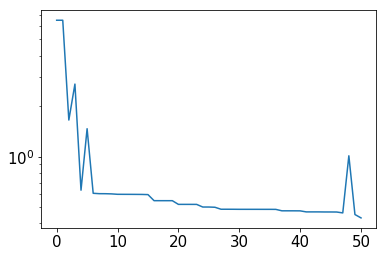

In [99]:
plt.plot(balance_list)
plt.yscale('log')

this might be one of the reasons we see bumps : the scale (because we do not initialize very well). 

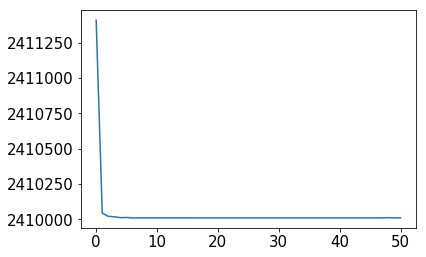

In [100]:
plt.plot(opt_res['obj'])
# plt.yscale('log')

In [66]:
G_ = G_list[-1]

In [68]:
for e in G_.edges():
    print(G_[e[0]][e[1]]['f_m'])

9.404467134713856
0.0
2.3232011025379267
0.5955328652861422
2.3232011025379267
0.0
9.404467134713856
7.6767988974620724


Here, we give it the "optimal" ri but it still does not lead us to a good balance value... 

And we still have optimal, inaccurate...

# 2 Nodes with no NN init

In this case we do not do NN init just to disentangle both problems. 

In [19]:
n_nodes=2

In [20]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [21]:
print(os.listdir(path))

['new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'new_init_with_step.pkl']


In [22]:
filename=os.listdir(path)[-2]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

line_search_notNNinit.pkl


In [14]:
params

{'L': 10000,
 'ni': 20,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

Even if the solution yielded "optimal inaccurate", we seem to have a much better behavior than before. 

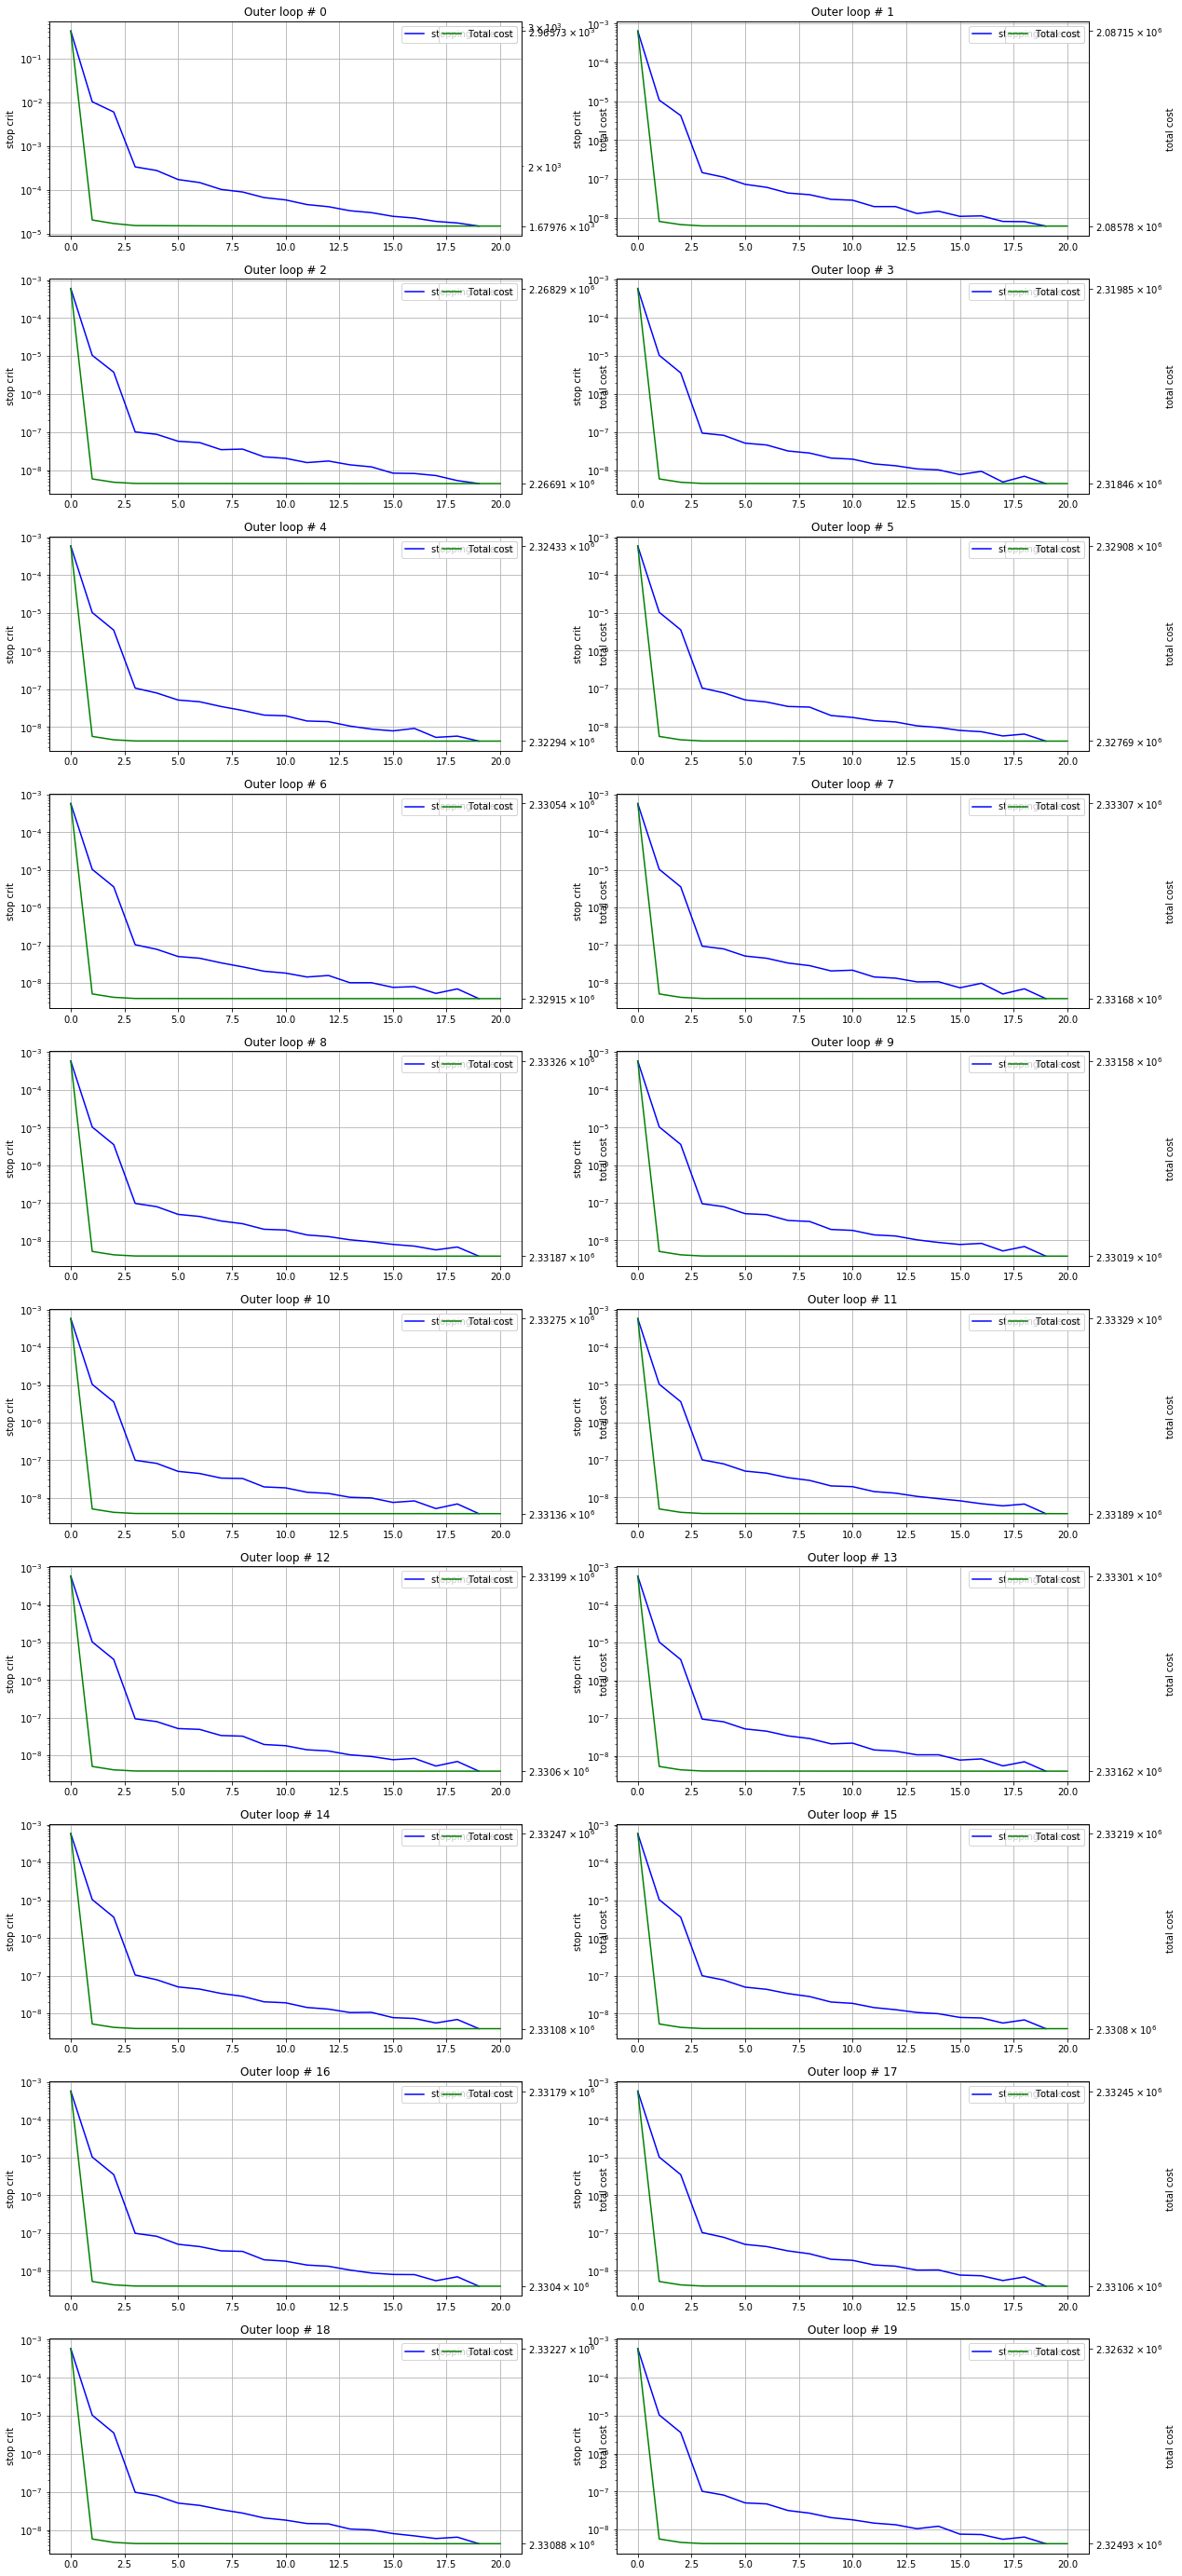

In [15]:
plot_stop_and_cost(opt_res1)

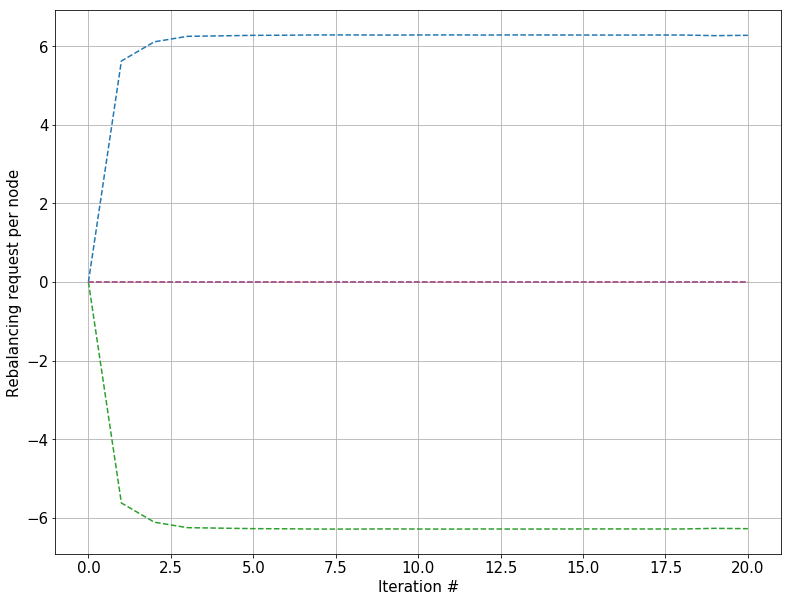

In [16]:
plot_ri_list(ri_FW1, save = False, path = None)

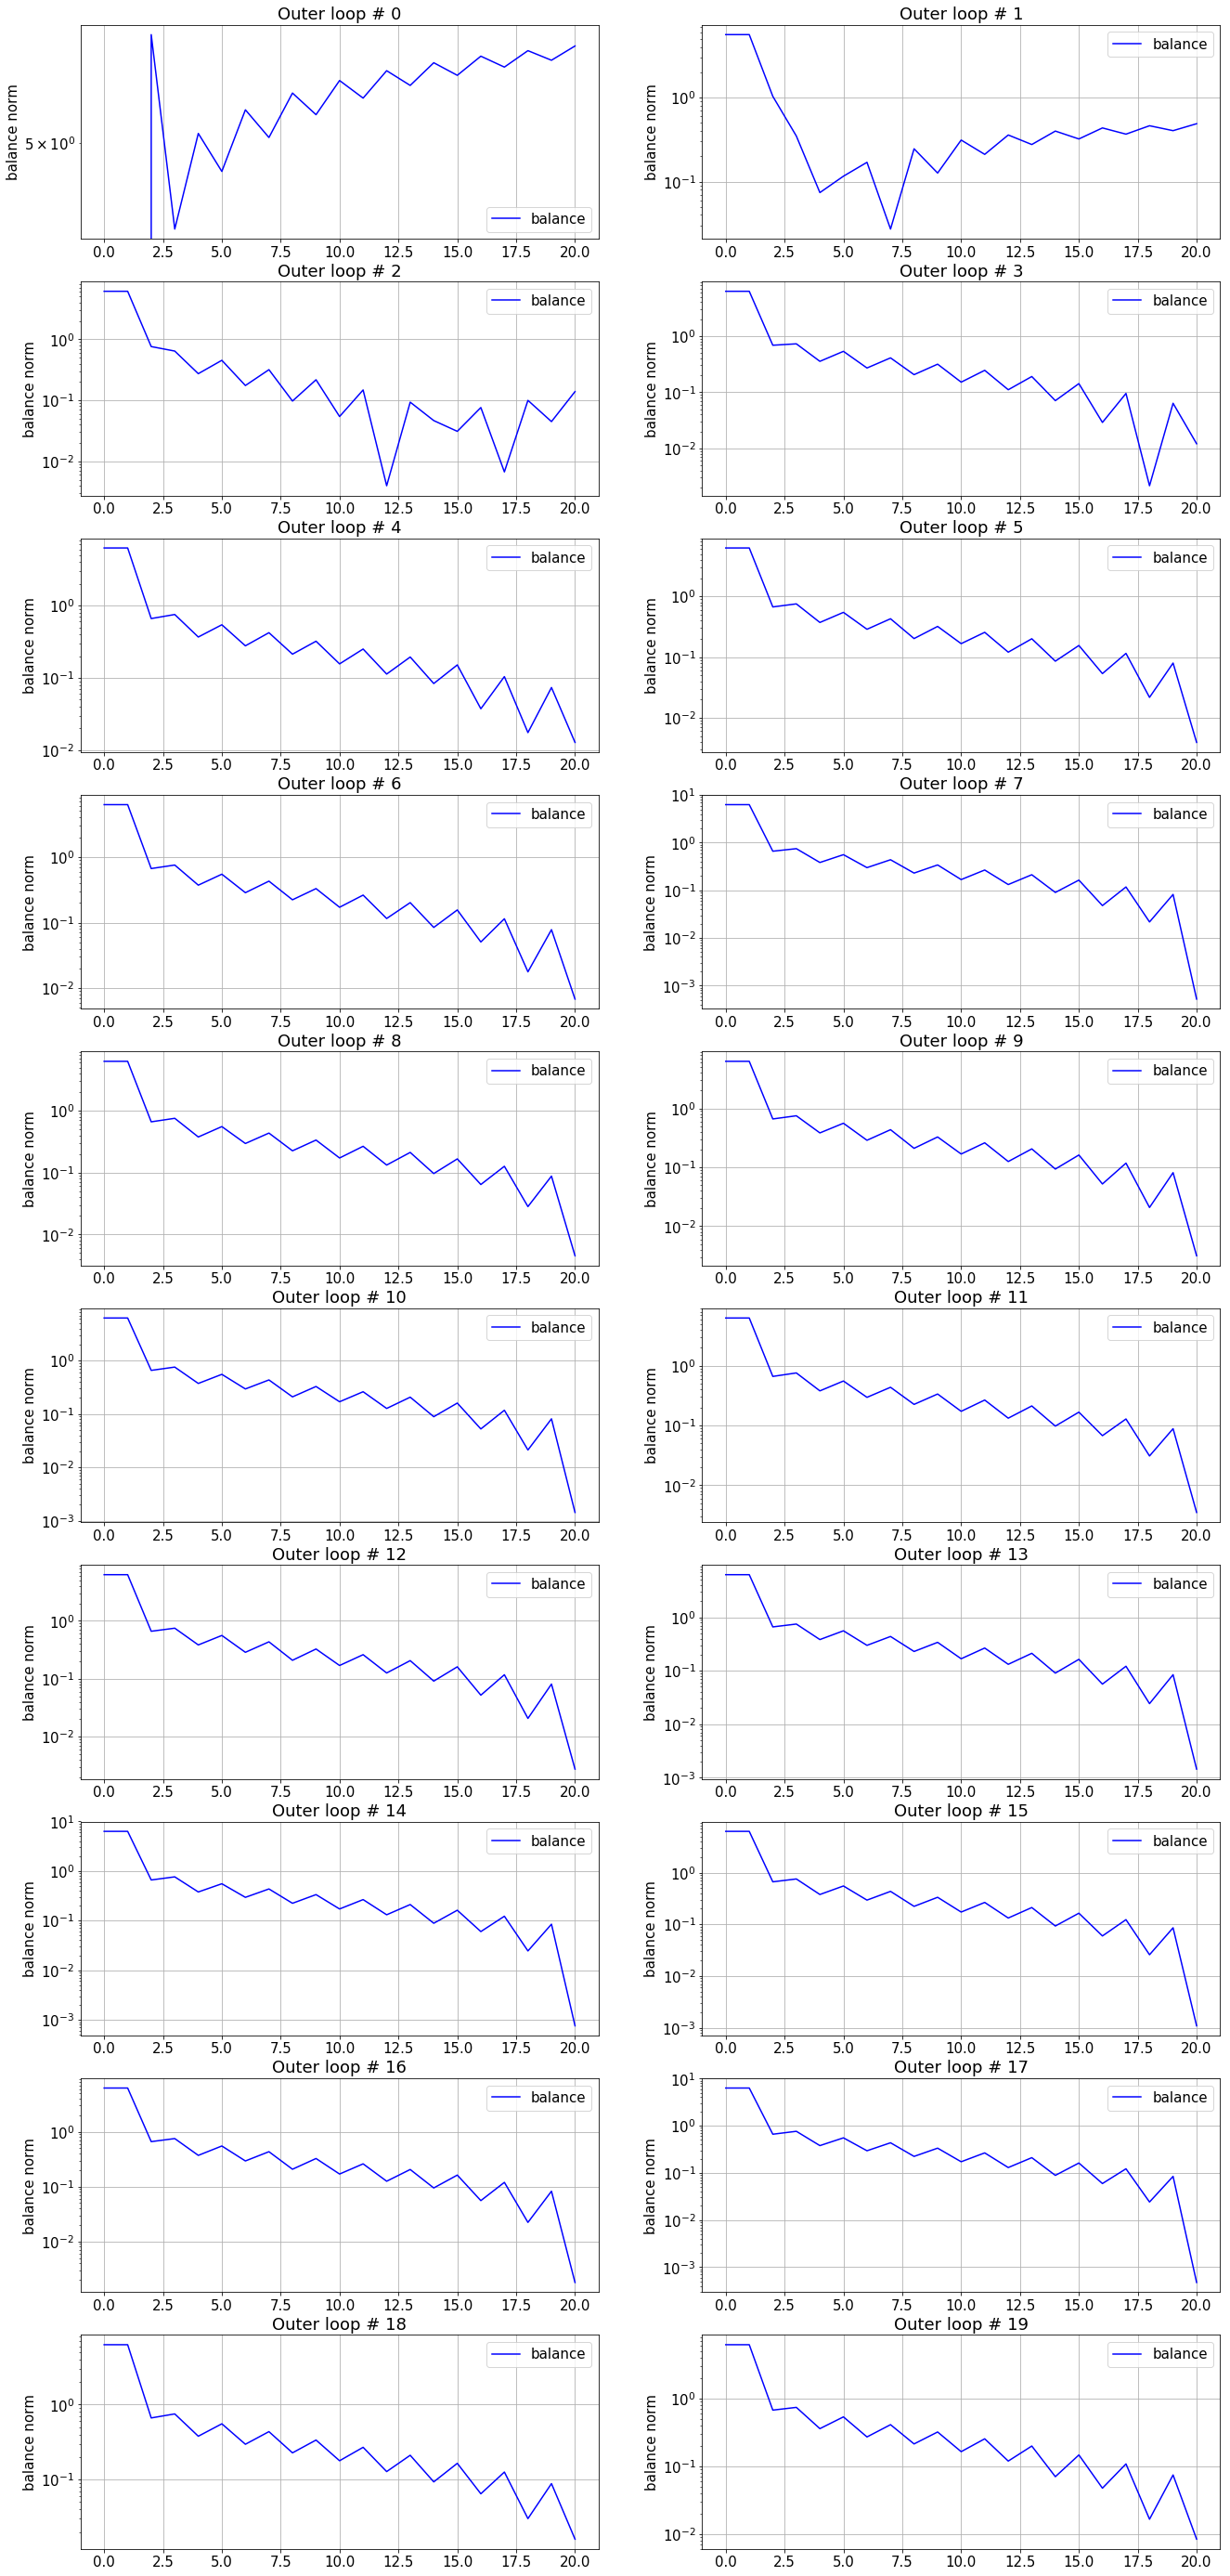

In [17]:
plot_balance_list(balance_list1, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

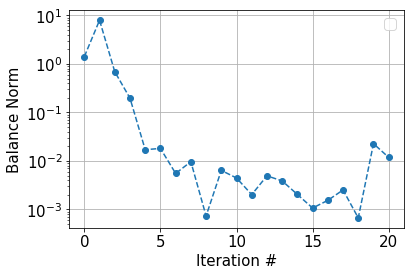

In [18]:
b=np.linalg.norm(balance1, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

# 2 Nodes with no NN init, with a longer inner iteration

In this case we do not do NN init just to disentangle both problems. 

In the previous iteration we have seen that we get somehow stuck at some stage (due to the initialization probably). As we have numerical problems with the initialization, we also make it run with longer inner iterations to see if that is indeed the problem. 

We are hoping that we get a decrease in balance after the longer iterations. 

In [34]:
n_nodes=2

In [35]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [36]:
print(os.listdir(path))

['line_search_notNNinit_longerNI.pkl', 'new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'line_search_withNNinit.pkl', 'new_init_with_step.pkl']


In [37]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

line_search_notNNinit_longerNI.pkl


In [38]:
params

{'L': 10000,
 'ni': 20,
 'no': 11,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

Even if the solution yielded "optimal inaccurate", we seem to have a much better behavior than before. 

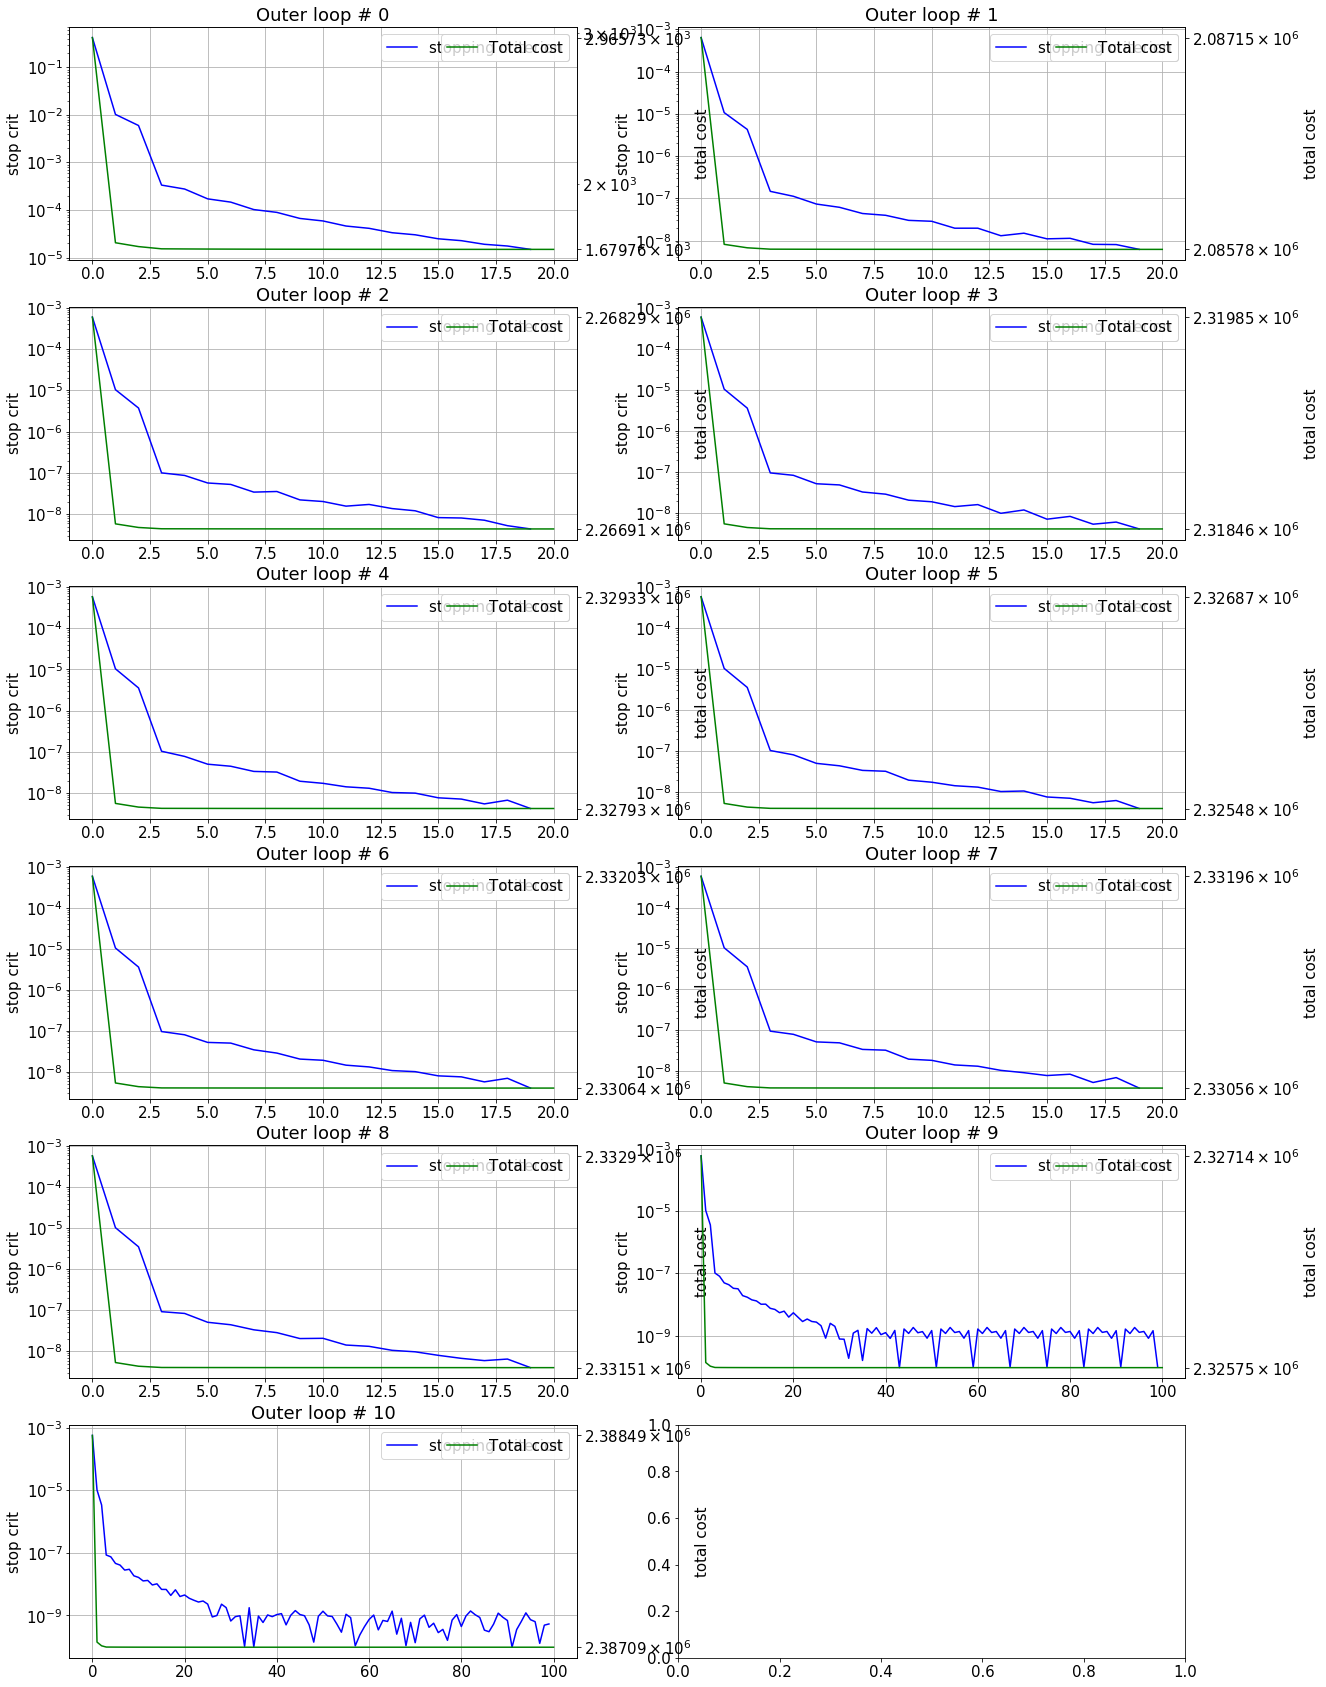

In [39]:
plot_stop_and_cost(opt_res1)

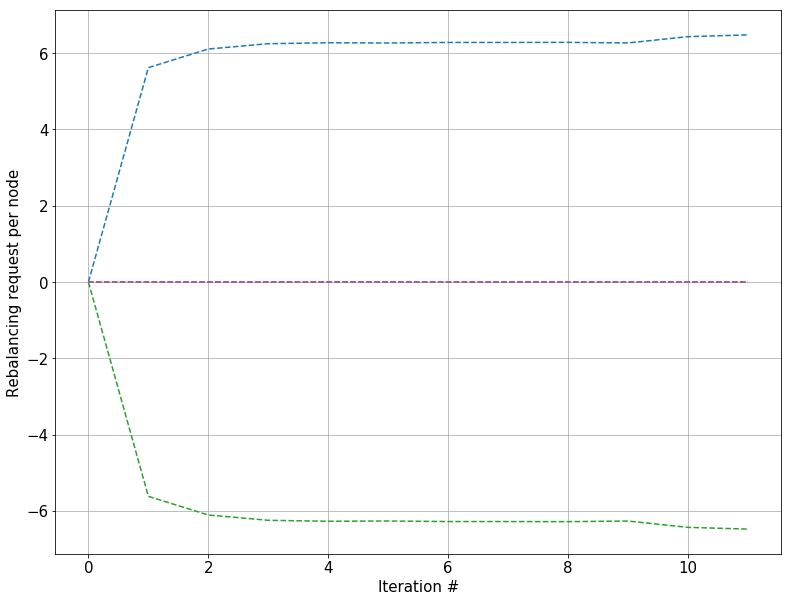

In [40]:
plot_ri_list(ri_FW1, save = False, path = None)

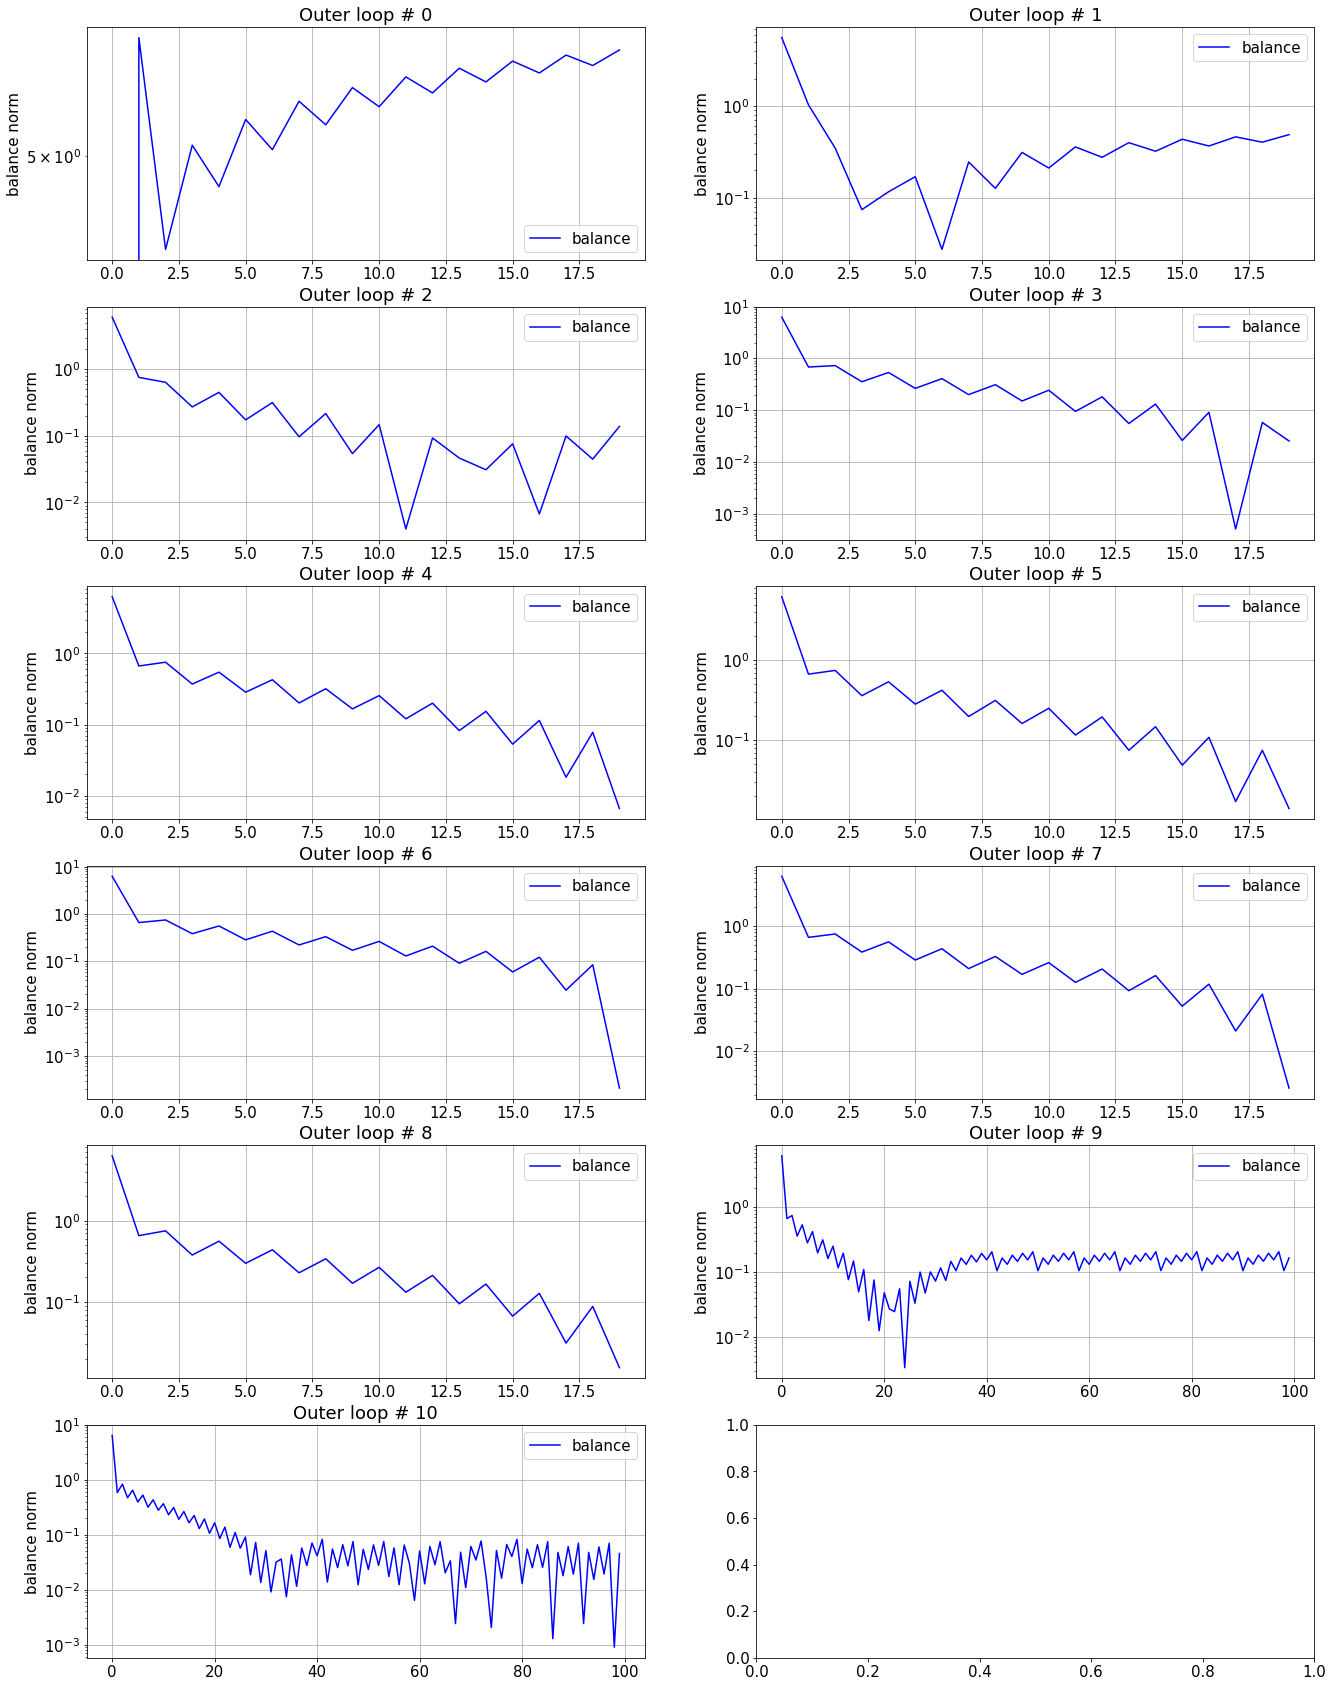

In [41]:
plot_balance_list(balance_list1, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

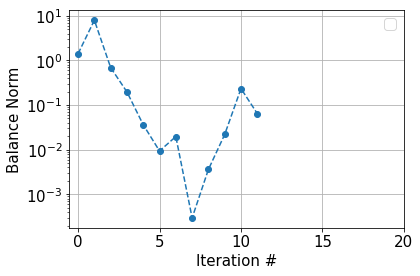

In [42]:
b=np.linalg.norm(balance1, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

# 2 Nodes WITH NN init

In this case we add NN init to see if we have better behavior, or not. 

In [23]:
n_nodes=2

In [24]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [44]:
print(os.listdir(path))

['line_search_notNNinit_longerNI.pkl', 'new_init.pkl', 'initial_setup.pkl', 'line_search_notNNinit.pkl', 'line_search_withNNinit.pkl', 'new_init_with_step.pkl']


In [45]:
filename=os.listdir(path)[-2]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

line_search_withNNinit.pkl


In [27]:
params

{'L': 10000,
 'ni': 20,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

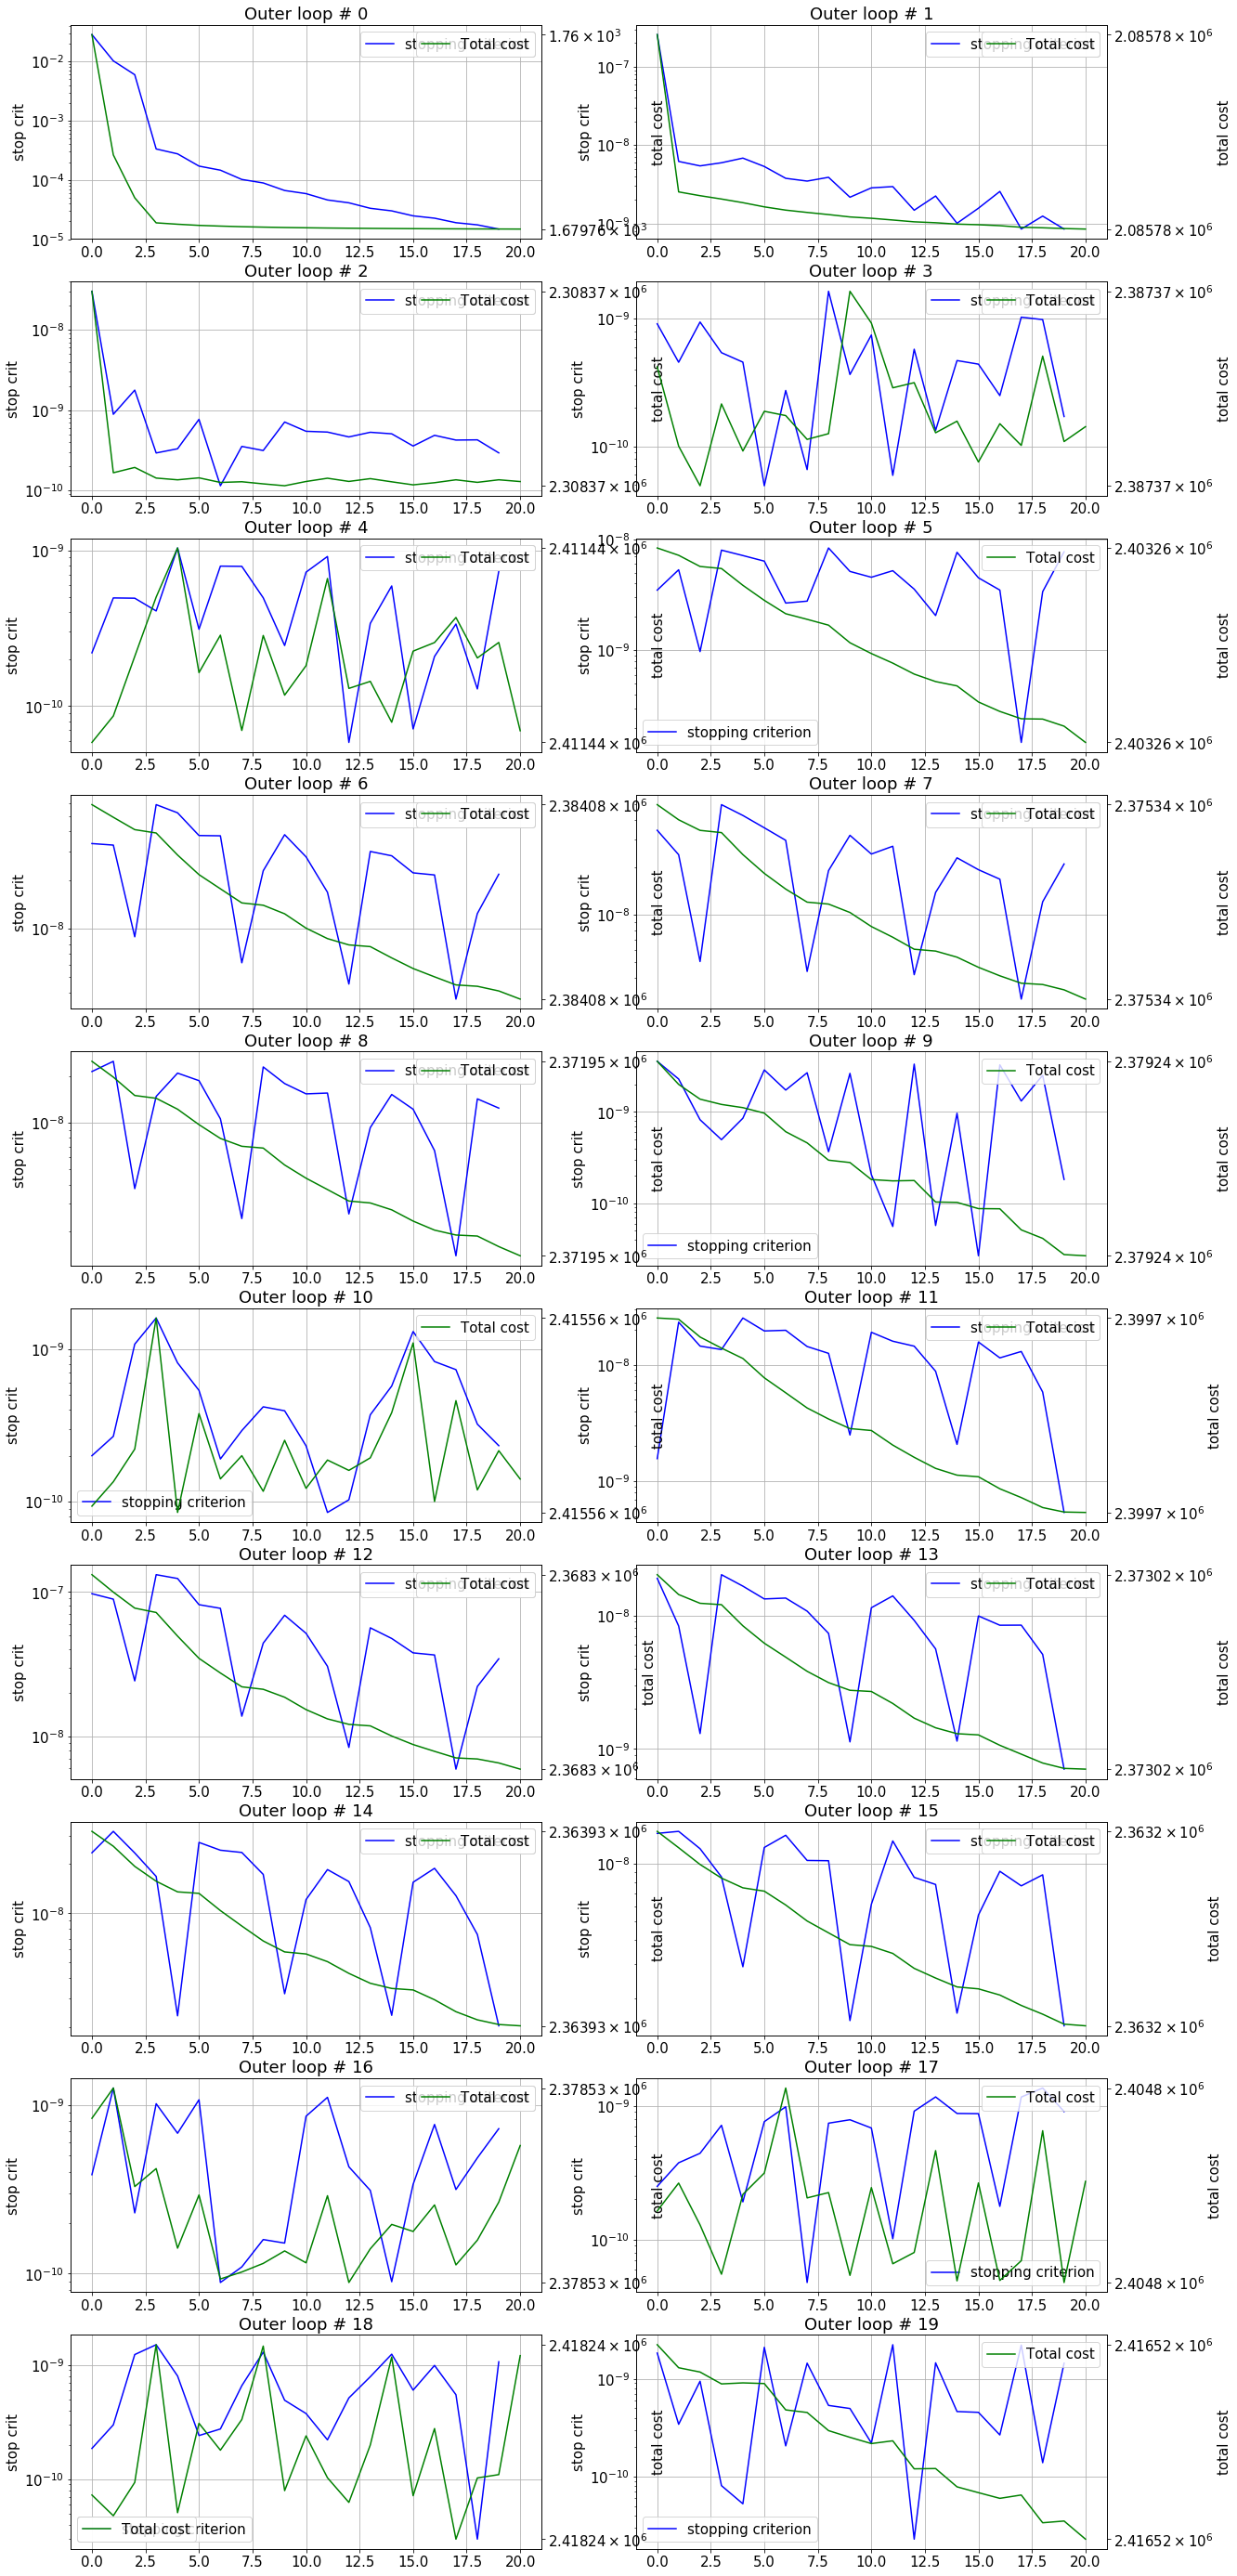

In [28]:
plot_stop_and_cost(opt_res1)

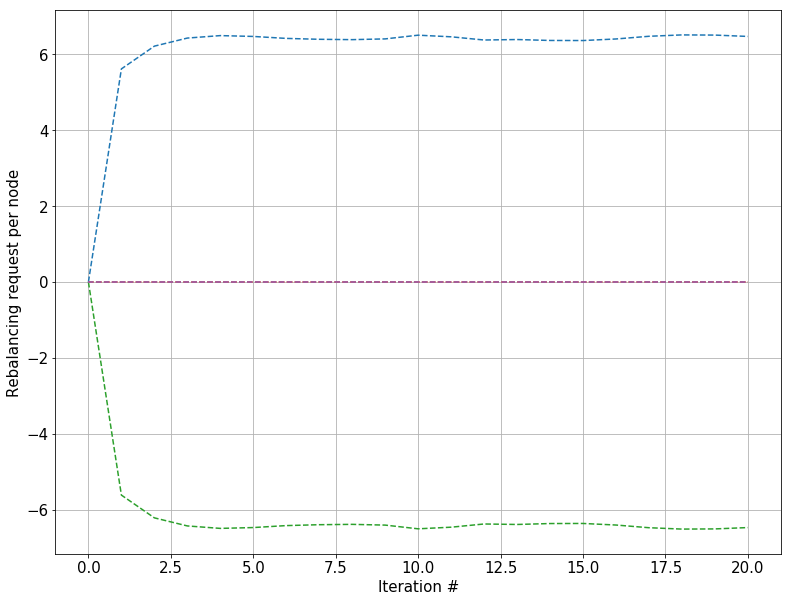

In [46]:
plot_ri_list(ri_FW1, save = False, path = None)

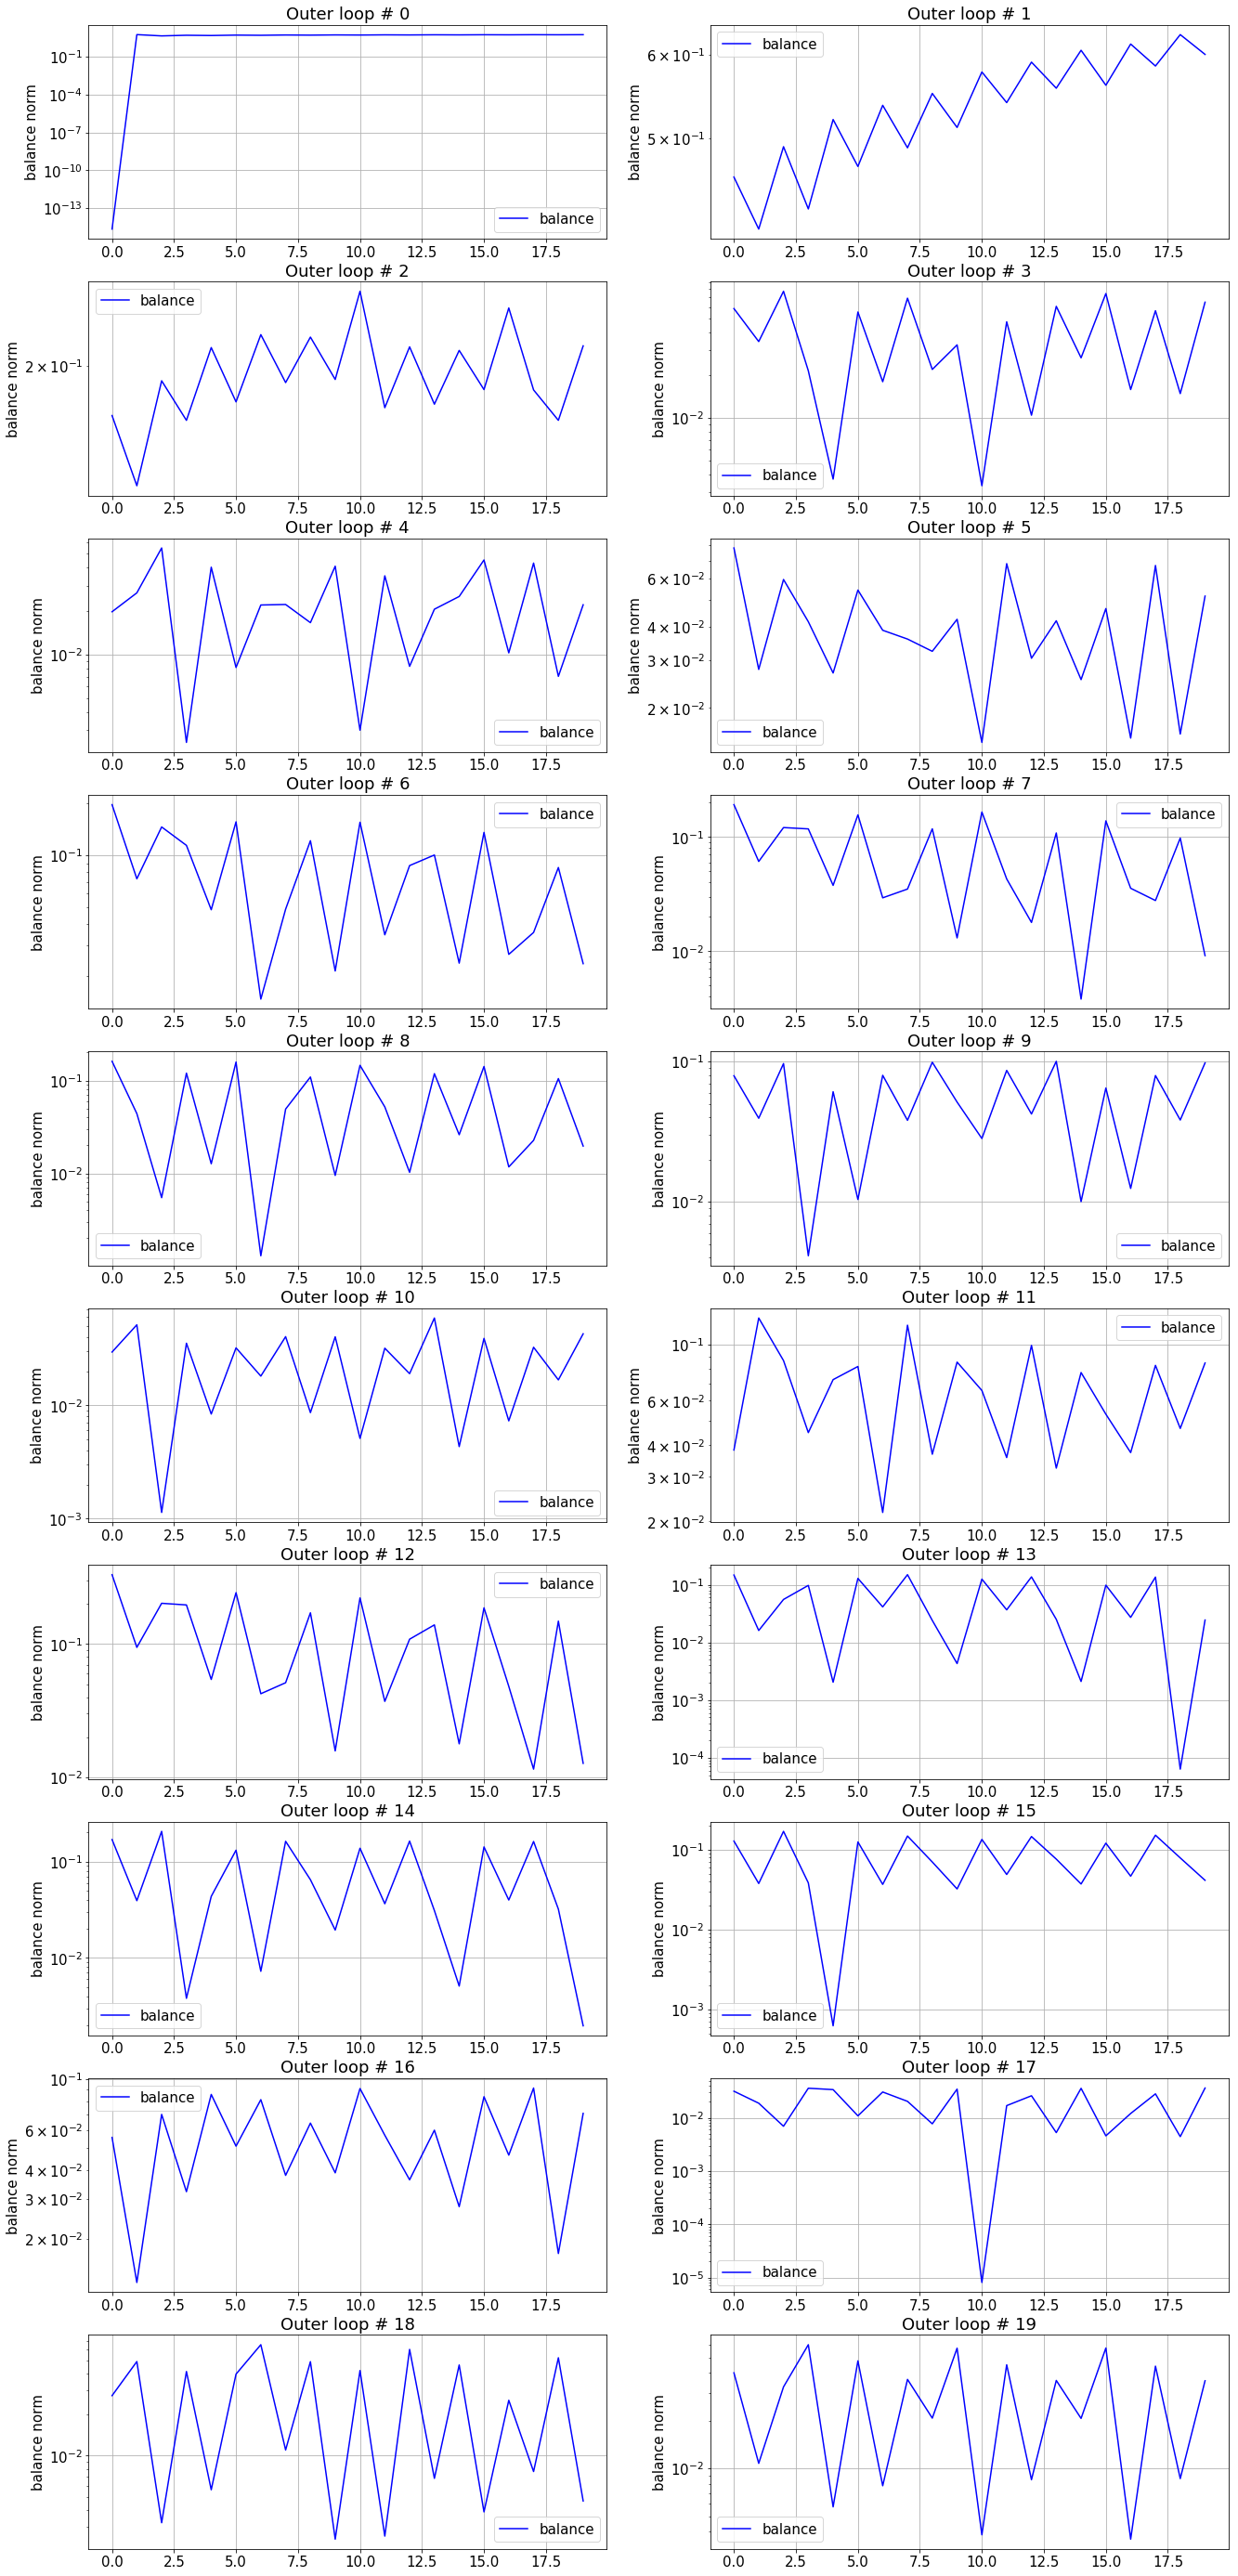

In [32]:
plot_balance_list(balance_list1, b_scale='log')

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

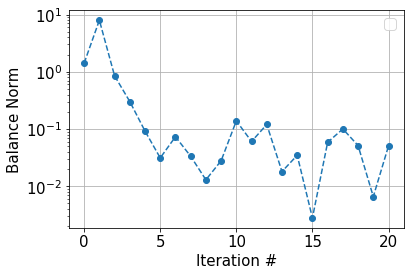

In [31]:
b=np.linalg.norm(balance1, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')